In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import Ridge



In [8]:
# Load the dataset
df = pd.read_csv("car_fuel_efficiency.csv")

# Display the first few rows to get a sense of the data
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


C:\Users\Krish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


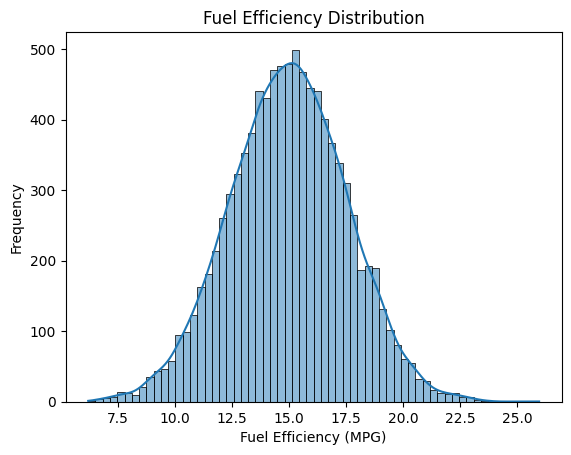

In [10]:
# Plot the distribution of 'fuel_efficiency_mpg'
sns.histplot(df['fuel_efficiency_mpg'], kde=True)
plt.title('Fuel Efficiency Distribution')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64


In [16]:
# Calculate the median (50th percentile) for 'horsepower'
median_hp = df['horsepower'].median()
print(f"Median horsepower: {median_hp}")

Median horsepower: 149.0


In [20]:
# Shuffle and split the data
X = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']]
y = df['fuel_efficiency_mpg']

# Split the data into train, validation, and test sets (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [24]:
# Fill missing values with 0 for 'horsepower'
X_train_zero = X_train.copy()
X_val_zero = X_val.copy()
X_train_zero['horsepower'].fillna(0, inplace=True)
X_val_zero['horsepower'].fillna(0, inplace=True)

# Train the model without regularization (Linear Regression)
model_zero = LinearRegression()
model_zero.fit(X_train_zero, y_train)

# Predict on validation set
y_val_pred_zero = model_zero.predict(X_val_zero)

# Calculate RMSE
rmse_zero = np.sqrt(mean_squared_error(y_val, y_val_pred_zero))
print(f"RMSE with '0' fill: {round(rmse_zero, 2)}")


RMSE with '0' fill: 0.52


C:\Users\Krish\AppData\Local\Temp\ipykernel_30156\2330523963.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_zero['horsepower'].fillna(0, inplace=True)
C:\Users\Krish\AppData\Local\Temp\ipykernel_30156\2330523963.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [26]:
# Calculate the mean of 'horsepower' in the training data
mean_hp = X_train['horsepower'].mean()

# Fill missing values with the mean for 'horsepower'
X_train_mean = X_train.copy()
X_val_mean = X_val.copy()
X_train_mean['horsepower'].fillna(mean_hp, inplace=True)
X_val_mean['horsepower'].fillna(mean_hp, inplace=True)

# Train the model without regularization (Linear Regression)
model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train)

# Predict on validation set
y_val_pred_mean = model_mean.predict(X_val_mean)

# Calculate RMSE
rmse_mean = np.sqrt(mean_squared_error(y_val, y_val_pred_mean))
print(f"RMSE with 'mean' fill: {round(rmse_mean, 2)}")

RMSE with 'mean' fill: 0.46


C:\Users\Krish\AppData\Local\Temp\ipykernel_30156\3461689814.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_mean['horsepower'].fillna(mean_hp, inplace=True)
C:\Users\Krish\AppData\Local\Temp\ipykernel_30156\3461689814.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [32]:
# Fill missing values with 0 for 'horsepower'
X_train_zero['horsepower'].fillna(0, inplace=True)
X_val_zero['horsepower'].fillna(0, inplace=True)

# Try different values of r (regularization strength)
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    model_ridge = Ridge(alpha=r)
    model_ridge.fit(X_train_zero, y_train)
    
    # Predict on validation set
    y_val_pred_ridge = model_ridge.predict(X_val_zero)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_ridge))
    rmse_scores[r] = round(rmse, 2)

# Display the RMSE scores for each r value
print(rmse_scores)


{0: 0.52, 0.01: 0.52, 0.1: 0.52, 1: 0.52, 5: 0.52, 10: 0.52, 100: 0.52}


C:\Users\Krish\AppData\Local\Temp\ipykernel_30156\1828427741.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_zero['horsepower'].fillna(0, inplace=True)
C:\Users\Krish\AppData\Local\Temp\ipykernel_30156\1828427741.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [34]:
# List of seed values
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores_seeds = []

for seed in seeds:
    # Split the data with the current seed
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)
    
    # Fill missing values with 0
    X_train['horsepower'].fillna(0, inplace=True)
    X_val['horsepower'].fillna(0, inplace=True)
    
    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    rmse_scores_seeds.append(rmse)

# Calculate the standard deviation of the RMSE scores
std_dev = np.std(rmse_scores_seeds)
print(f"Standard deviation of RMSE scores: {round(std_dev, 3)}")


Standard deviation of RMSE scores: 0.006


C:\Users\Krish\AppData\Local\Temp\ipykernel_30156\612411080.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['horsepower'].fillna(0, inplace=True)
C:\Users\Krish\AppData\Local\Temp\ipykernel_30156\612411080.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [36]:
# Split the data with seed 9
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=9)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=9)

# Combine the train and validation datasets
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

# Fill missing values with 0 for 'horsepower'
X_train_val['horsepower'].fillna(0, inplace=True)
X_test['horsepower'].fillna(0, inplace=True)

# Train a linear regression model (no regularization)
model_lr = LinearRegression()
model_lr.fit(X_train_val, y_train_val)

# Predict on the test set
y_test_pred = model_lr.predict(X_test)

# Calculate RMSE on the test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE on the test dataset: {round(rmse_test, 3)}")


RMSE on the test dataset: 0.521


C:\Users\Krish\AppData\Local\Temp\ipykernel_30156\2029353616.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_val['horsepower'].fillna(0, inplace=True)
C:\Users\Krish\AppData\Local\Temp\ipykernel_30156\2029353616.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 